# Simple example of optimization using Genetic algorithms

Sum of a list of numbers must add to a fixed number

In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [453]:
#Creates an individual as a class
class individual():
    def __init__(self, genome, species):
        self.genome = genome
        self.species = species

In [454]:
#Spawn individual with random genome and species 0
def spawn(min=0, max=50, species=-1):
    genome = np.random.randint(min, max, 10)
    return individual(genome, species)

In [455]:
#Create a list of individuals
def population(n_pop):
    return [spawn() for i in range(n_pop)]

In [456]:
# Fitness function
def fitness(ind, goal):
    return abs(goal - np.sum(ind.genome))

In [457]:
def population_fitness(pop, goal):
    return np.average([fitness(i, goal) for i in pop])

In [458]:
# Random selection
def rand_select(fit, unfit, random_selection):
    for i in unfit:
        if random_selection > np.random.random():
            fit.append(i)
    return fit

In [459]:
# Mutations
def mutate(ind):
    mutate_pos = np.random.randint(0,len(ind.genome))
    mutate_val = np.random.randint(10,50)
    ind.genome[mutate_pos] = mutate_val
    return ind

In [460]:
# Crossover (one point)

def crossover(male, female):
    child = spawn()
    point_of_cross = int(len(male.genome)/2)
    child.genome = np.append(male.genome[:point_of_cross],female.genome[point_of_cross:])
    return child

1. calculate fitness of population
2. sort population by fitness
3. retain 20% as fit, remaining as unfit
4. random select few from unfit and add to new fit
5. mutate few from new fit
6. crossover between species to fill remaining population
7. calculate 'species' based on spatial similarity
8. return new parents

In [461]:
# Evolve

def evolve(pop, goal, mutation=0.05, random_selection = 0.05, retain=0.2):
    fitness_scores = [(i,fitness(i,goal)) for i in pop]
    fittest_first = sorted(fitness_scores, key=lambda x:x[1])
    
    #retain fittest
    retain_len = int(len(pop)*0.2)
    fit = fittest_first[:retain_len]
    unfit = fittest_first[retain_len:]
    
    #random select to fit from unfit
    new_fit = [i[0] for i in rand_select(fit, unfit, random_selection)]
    
    #Mutate
    for i in new_fit:
        if mutation > np.random.random():
            mutate(i)
    
    #Crossover
    remaining_pop = len(pop) - len(new_fit)
    children = []
    
    species_num = np.unique([i.species for i in new_fit])
    
    while len(children) < remaining_pop:
        if len(species_num) > 1:
            for j in species_num:
                species_pop = [i for i in new_fit if i.species==j]
                parent_indices = np.random.choice(len(species_pop), 2)
                parents = [species_pop[i] for i in parent_indices]
                child = crossover(parents[0], parents[1])
                children.append(child)
        else:
            parent_indices = np.random.choice(len(new_fit), 2)
            parents = [new_fit[i] for i in parent_indices]
            child = crossover(parents[0], parents[1])
            children.append(child)
        
    new_pop = new_fit+children
        
    return new_pop

In [462]:
def label_species(pop):
    n = 5
    scores = []
    genomes = [i.genome for i in pop]
    
    for i in range(1,n):
        km = KMeans(n_clusters=n)
        km.fit(genomes)
        scores.append(silhouette_score(genomes, km.labels_, metric='euclidean'))

    optimal_clusters = np.argmax(scores)+1
    km = KMeans(n_clusters=optimal_clusters)
    km.fit(genomes)

    for i in range(len(pop)):
        pop[i].species = km.labels_[i]
    
    return pop

In [469]:
def generations(n_generations, pop, goal):
    
    fitness_history = []
    for i in range(n_generations):
        fitness_history.append(population_fitness(pop, goal))
        pop = evolve(pop, goal)
        pop = label_species(pop)
        
    plt.plot(fitness_history)
    
    fitness_scores = [(i,fitness(i,goal)) for i in pop]
    citizens = sorted(fitness_scores, key=lambda x:x[1])
    citizens2 = [(i[0].genome, i[0].species, i[1]) for i in citizens]
    
    
    
    return citizens2
    #return pop

[(array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24),
 (array([47, 49, 45, 49, 49, 48, 48, 46, 49, 46]), 0, 24

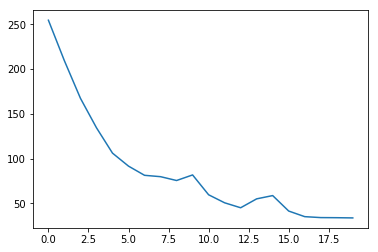

In [470]:
pop = population(1000)
generations(20, pop, 500)